In [1]:
import pandas as pd
from matplotlib import pyplot as plt

First step is to load the csv file in the form of a dataframe:

In [2]:
hd = pd.read_csv("housing.csv")

In [3]:
ob=hd.copy()

Let's take a closer look at our data

In [4]:
hd.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
hd.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Notice how we used the color and size property of the scatter plot to get more analysis of the dataset we have.

[]

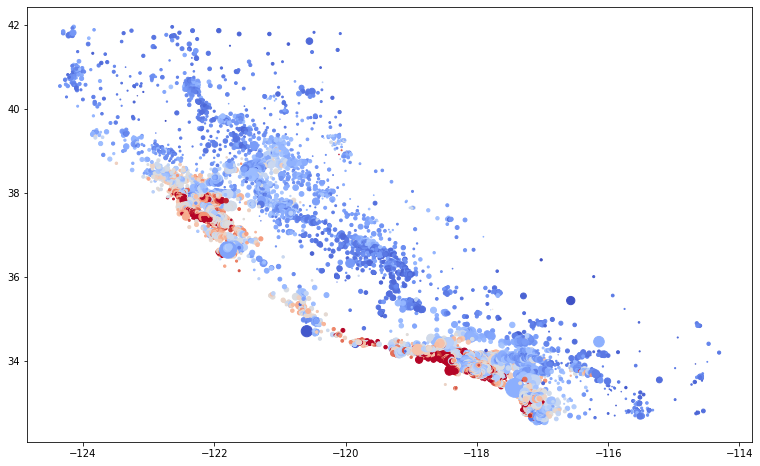

In [6]:
plt.figure(figsize=(13,8))
plt.scatter(hd['longitude'],
           hd['latitude'],
           cmap='coolwarm',
            s=hd['population']/100,
           c=hd['median_house_value']/
            hd['median_house_value'].max())

plt.plot()

Dataset contains a column of ocean_proximity. Print out the different unique values in this column

In [7]:
hd.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

Plot a pie chart that that shows the ocean_proximity data

In [8]:
a=pd.Series(hd.ocean_proximity.value_counts())
number=a

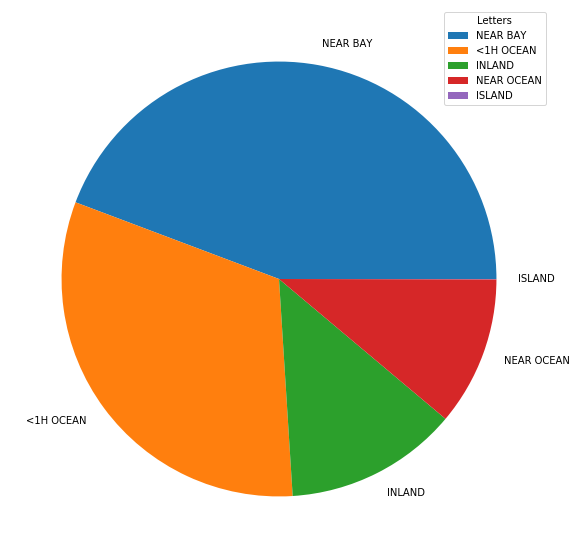

In [9]:
letters=['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND']
#number=[hd.ocean_proximity.value_counts()['NEAR BAY'],hd.ocean_proximity.value_counts()['<1H OCEAN'],
 #      hd.ocean_proximity.value_counts()['INLAND'],hd.ocean_proximity.value_counts()['NEAR OCEAN'],
  #     hd.ocean_proximity.value_counts()['ISLAND']]

plt.figure(figsize=(10,10))
plt.pie(hd.ocean_proximity.value_counts(), labels=letters)
plt.legend(title='Letters')

TypeError: pie() missing 1 required positional argument: 'x'

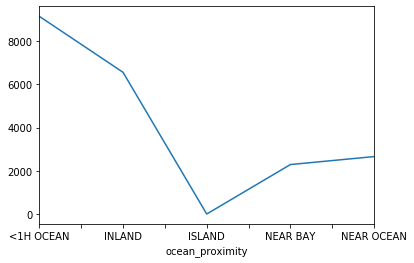

In [10]:
hd.groupby('ocean_proximity').size().plot().pie()

In [11]:
hd.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [12]:
hd.ocean_proximity.size

20640

Plot a histogram to view the distribution of the median_house_value

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ABEFF0F108>]],
      dtype=object)

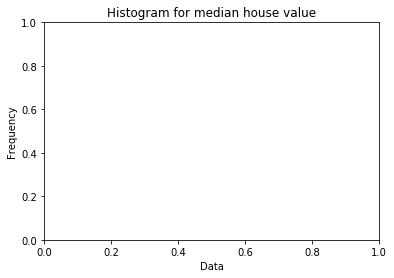

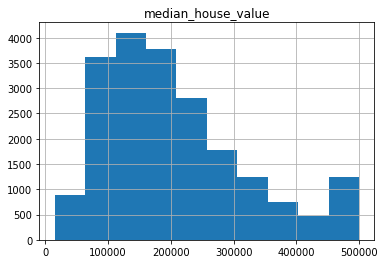

In [13]:
plt.title('Histogram for median house value')
plt.xlabel('Data')
plt.ylabel("Frequency")
#plt.hist(hd['median_house_value'])
hd.hist('median_house_value')


Similarly, plot a histogram for the housing age

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ABEF5E1688>]],
      dtype=object)

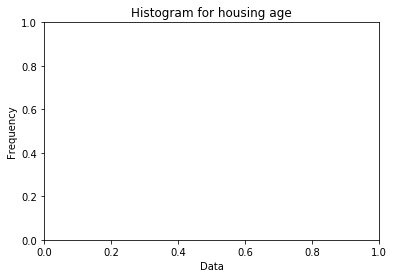

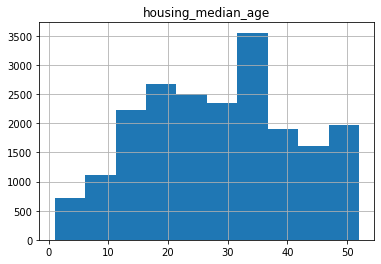

In [14]:
plt.title('Histogram for housing age')
plt.xlabel('Data')
plt.ylabel("Frequency")
#plt.hist(hd['housing_median_age'])
hd.hist('housing_median_age')

Try to deduce a relationship between the housing_median_age and median_house_value

Text(0, 0.5, 'Median house value')

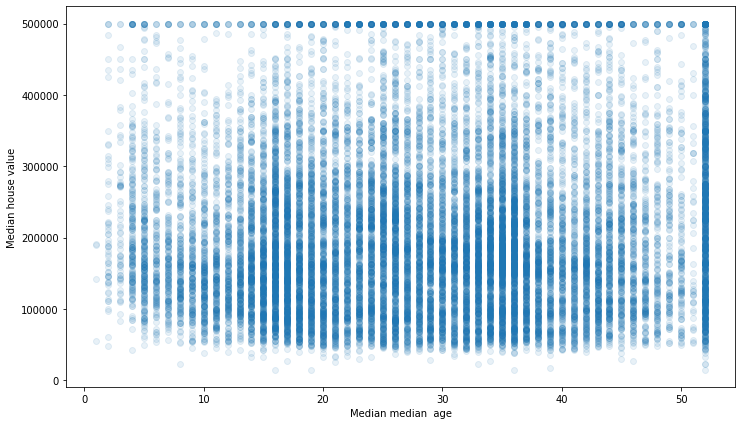

In [15]:
plt.figure(figsize=(12,7))
plt.scatter(hd['housing_median_age'],hd['median_house_value'],alpha=0.1)
plt.xlabel('Median median  age')
plt.ylabel('Median house value')



In [ ]:
corr_matrix=hd.corr()
corr_matrix.housing_median_age.sort_values(ascending=False)

Let's analyse the data we have and find the best spot to open a restaurant in the city of San Fransico. The given coordinates are rough approximation for SF:

In [16]:
sf_df = hd.loc[((hd['latitude'] <= 37.809892) 
                &(hd['latitude'] >= 37.599109)) 
                    & ((hd['longitude'] <= -122.363868) 
                       & (hd['longitude'] >= -122.553299))]

[]

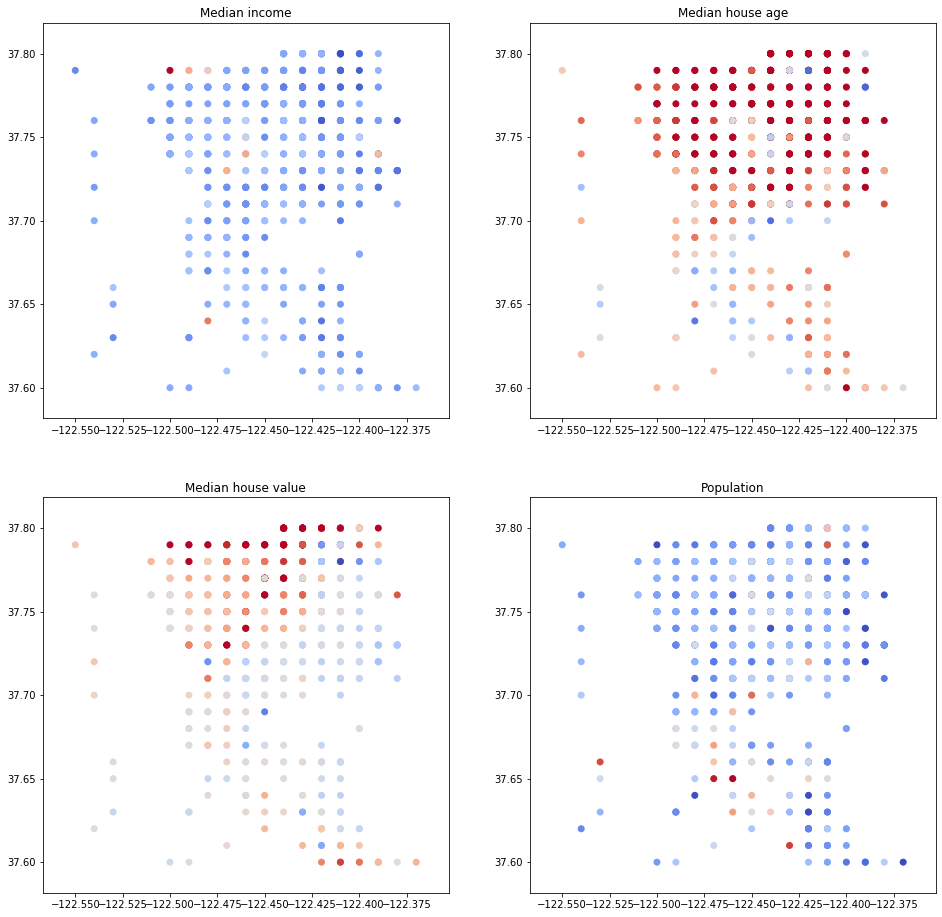

In [17]:
plt.figure(figsize=(16,16))
plt.subplot(2,2,1)
plt.title("Median income")
plt.scatter(sf_df['longitude'],
           sf_df['latitude'],cmap='coolwarm',
            c=sf_df['median_income']/sf_df['median_income'].max())
plt.plot()

plt.subplot(2,2,2)
plt.title("Median house age")
plt.scatter(sf_df['longitude'],
           sf_df['latitude'],cmap='coolwarm',
            c=sf_df['housing_median_age']/sf_df['housing_median_age'].max())
plt.plot()

plt.subplot(2,2,3)
plt.title("Median house value")
plt.scatter(sf_df['longitude'],
           sf_df['latitude'],cmap='coolwarm',
            c=sf_df['median_house_value']/sf_df['median_house_value'].max())
plt.plot()


plt.subplot(2,2,4)
plt.title("Population")
plt.scatter(sf_df['longitude'],
           sf_df['latitude'],cmap='coolwarm',
            c=sf_df['population']/100)
plt.plot()



In [18]:
sf_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,692.000000,692.000000,692.000000,692.000000,683.000000,692.000000,692.000000,692.000000,692.000000
mean,-122.443179,37.738295,44.663295,2409.708092,551.881406,1305.812139,520.468208,4.024552,325889.283237
std,0.032342,0.049234,10.381336,1267.899888,327.351962,733.945204,301.313406,1.604756,99354.811127
min,-122.550000,37.600000,2.000000,8.000000,1.000000,11.000000,1.000000,0.854300,32500.000000
25%,-122.470000,37.720000,39.000000,1607.500000,341.000000,855.750000,328.750000,3.198125,251725.000000
50%,-122.440000,37.750000,51.000000,2194.500000,480.000000,1167.000000,454.000000,3.891650,309650.000000
75%,-122.420000,37.780000,52.000000,2943.500000,682.500000,1578.500000,645.500000,4.547500,394025.000000
max,-122.370000,37.800000,52.000000,10252.000000,2747.000000,5130.000000,2538.000000,15.000100,500001.000000


In [19]:
corr_matrix=sf_df.corr()
corr_matrix.population.sort_values(ascending=False)

population            1.000000
total_rooms           0.862353
households            0.854807
total_bedrooms        0.832821
longitude            -0.018874
median_house_value   -0.168648
median_income        -0.180366
latitude             -0.198963
housing_median_age   -0.298726
Name: population, dtype: float64